In [111]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import data_processing as dp
from scipy import signal
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py

In [2]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

.\data\G04_FoG_trial_1_emg.csv
.\data\G04_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_1_emg.csv
.\data\G06_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_3_emg.csv
.\data\G07_Freezing_Trial1_trial_1_emg.csv
.\data\G08_FoG_1_trial_1_emg.csv
.\data\G08_FoG_2_trial_1_emg.csv
.\data\G11_FoG_trial_1_emg.csv
.\data\G11_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_3_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_3_emg.csv
.\data\P551_M050_2_A_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_2_emg.csv
.\data\P812_M050_2_B_FoG_trial_1_emg.csv
.\data\P812_M050_2_B_FoG_trial_2_emg.csv
.\data\其他\labels.txt
.\data\其他\P812_M050_2_B_FoG_trial1_annotation.csv
.\data\其他\P812_M050_2_B_FoG_trials.mat
.\data\其他\P812_M050_2_B_FoG_trial_1_out_left_foot.csv
.\data\其他\P812_M050_2_B_FoG_trial_1

In [516]:
emg_data = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_emg.csv')
#emg_data2 = pd.read_csv('.\data\正常\G03_Walking_trial_2_emg.csv')
path = '.\data\正常\G03_Walking_trial_2_emg.csv'
#emg_data3 = pd.read_csv(path)

In [4]:
emg_data = emg_data.fillna({'LEFT_BF':emg_data.LEFT_BF.mean(),
                           'LEFT_RF':emg_data.LEFT_RF.mean(),
                           'RIGHT_TA':emg_data.RIGHT_TA.mean(),
                           'RIGHT_TS':emg_data.RIGHT_TS.mean(),
                           'RIGHT_BF':emg_data.RIGHT_BF.mean(),
                           'RIGHT_RF':emg_data.RIGHT_RF.mean()})
emg_data.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [29]:
emg_data2 = emg_data2.fillna({'LEFT_BF':emg_data.LEFT_BF.mean(),
                            'LEFT_RF':emg_data.LEFT_RF.mean(),
                            'RIGHT_TA':emg_data.RIGHT_TA.mean(),
                            'RIGHT_TS':emg_data.RIGHT_TS.mean(),
                            'RIGHT_BF':emg_data.RIGHT_BF.mean(),
                            'RIGHT_RF':emg_data.RIGHT_RF.mean()})
emg_data2.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [365]:
path = './processed data/data_set_after_window_withoutSC.hdf5'
with h5py.File(path,'r') as f:
    x = f['cwt_data'][...]
    y = f['label2'][...]

In [44]:
#x,y = generate_window_slide_data(emg_data)
x2,y2 = generate_window_slide_data(emg_data2)

In [306]:
import imp
imp.reload(dp)

<module 'data_processing' from 'E:\\Document\\jupyter\\Master Thesis\\data_processing.py'>

In [343]:
feature = dp.generate_feature(x,2,0,bins=9,ranges=(-70,70))
#feature2 = dp.generate_feature(x2)
player.Beep(1000,200)

threshold_WAMP:2.0, threshold_ZC:0.0, threshold_SSC:0.0,bins:9,ranges:(-70,70)
IEMG,MAV,SSI,VAR,RMS,WL,ZC,SSC,WAMP,skew,Acti,AR


1

In [400]:
sc = StandardScaler(with_mean=False)
feature_sc = sc.fit_transform(feature)

In [401]:
feature_sc.max(axis=1)

array([10.36727542, 10.87437042, 10.70533875, ..., 11.55049708,
       11.4378093 , 11.26877764])

In [519]:
feature2,y2 = dp.pipeline_feature(path,scaler=False,threshold_WAMP=2,bins=9,ranges=(-70,70))
feature2_sc = sc.transform(feature2)

threshold_WAMP:2.0, threshold_ZC:0.0, threshold_SSC:0.0,bins:9,ranges:(-70,70)
IEMG,MAV,SSI,VAR,RMS,WL,ZC,SSC,WAMP,skew,Acti,AR


In [199]:
pca = PCA(n_components=60,copy=True)
feature_pca = pca.fit_transform(feature)
#feature2_pca = pca.transform(feature2)

In [14]:
np.mean(x[1,:,7])
y.shape

(44530,)

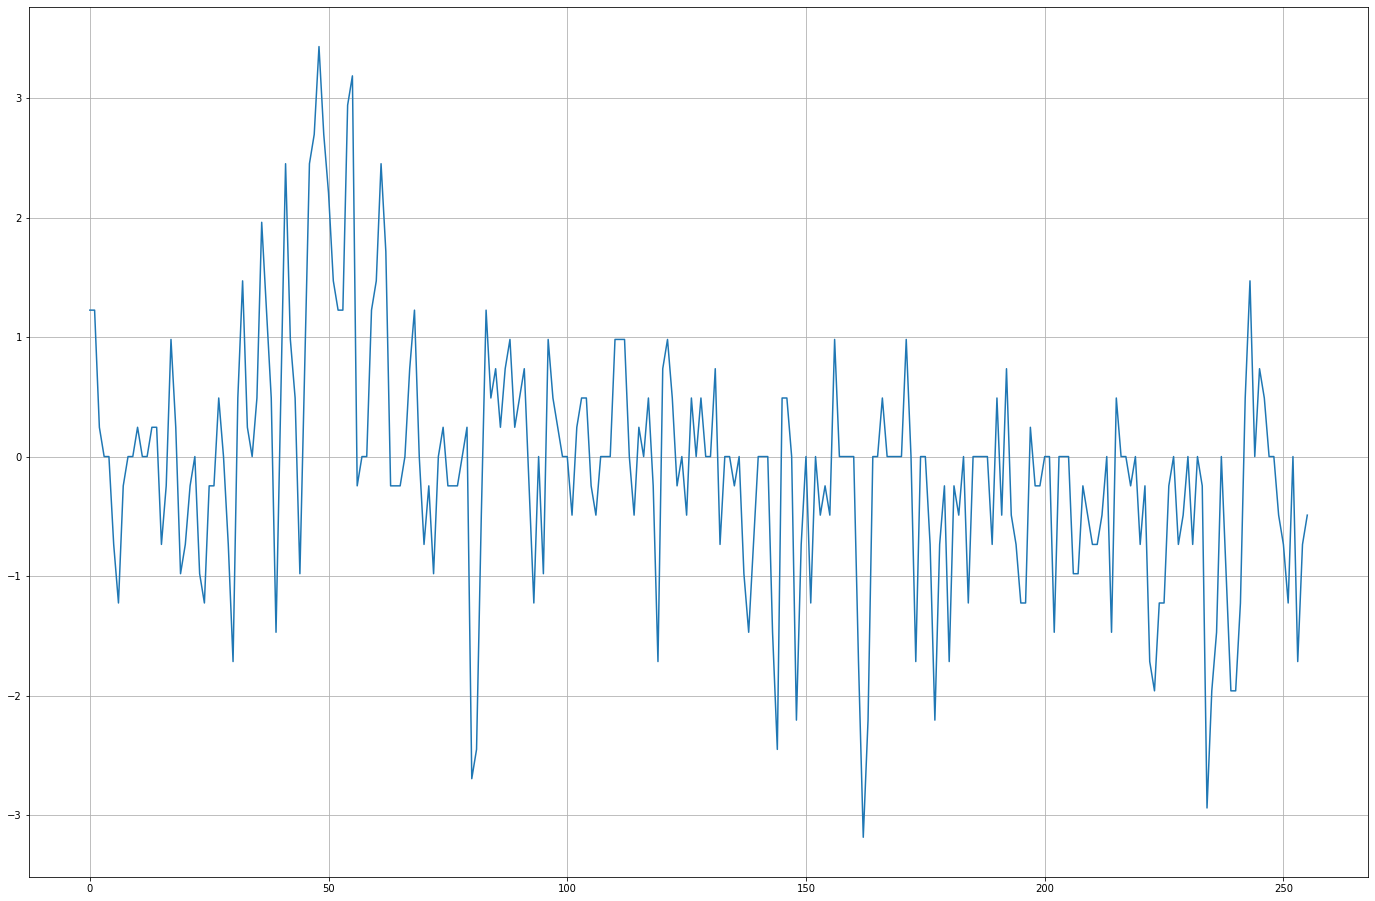

In [183]:
test=dp.compute_WAMP(x,15)
#plt.figure(figsize=(32,24))
plt.plot(x[250,:,1])
plt.grid(True)

In [7]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [511]:
#ind = ((y==1)|(y==2)|(y==3)|(y==6))
ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
ind_f = [0,1,6,42,46,57,62]
#y_01 = y[ind]
#y_01[y_01==1]=0
#y_01[y_01==2]=1
#y_01[y_01==3]=2
#y_01[y_01==6]=3
y_01 = y
y_01[ind] = 1
oh_ec = OneHotEncoder()
y_oh = oh_ec.fit_transform(y_01[:,np.newaxis]).toarray()
x_full,x_test,y_full,y_test = train_test_split(feature[:-2000],y_01[:-2000],test_size=0.2,random_state=123)
x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,test_size=0.2,random_state=555)
d_train = xgb.DMatrix(x_train,label=y_train)
d_valid = xgb.DMatrix(x_valid,label=y_valid)

In [512]:
param = {'max_depth': 5, 'eta': 0.3, 'gamma':0}
#param['nthread'] = 4
param['seed'] = 100
param['objective'] = 'binary:logistic'
#param['objectibe'] = 'multi:softmax'
#param['num_class'] = 4
param['lambda'] = 2
param['subsample'] = 0.8
evallist = [(d_train, 'train'), (d_valid, 'eval')]
#model = xgb.XGBClassifier(max_depth=6, 
#                          learning_rate=0.1, 
#                          n_estimators=1000, 
#                          silent=True, 
#                          eval_metrics='error',
#                          #objective='binary:logistic', 
#                          objective='multi:softmax',
#                          num_calss=5,
#                          seed=100,
#                          nthread=4,
#                          sub_sabsample=0.8
                          #gamma=0.1,
#                         )
eval_set=[(x_train,y_train),(x_valid,y_valid)]
#model.fit(x_train, y_train,eval_metric=['error'],eval_set=eval_set,early_stopping_rounds=25)
model = xgb.train(param, d_train, 1000, evallist,early_stopping_rounds=30)
player.Beep(1000,200)

[0]	train-error:0.18010	eval-error:0.19265
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 30 rounds.
[1]	train-error:0.14291	eval-error:0.15518
[2]	train-error:0.13336	eval-error:0.14651
[3]	train-error:0.13311	eval-error:0.14269
[4]	train-error:0.12131	eval-error:0.13167
[5]	train-error:0.11312	eval-error:0.12388
[6]	train-error:0.10618	eval-error:0.11918
[7]	train-error:0.10342	eval-error:0.11639
[8]	train-error:0.09967	eval-error:0.11374
[9]	train-error:0.09714	eval-error:0.11036
[10]	train-error:0.09236	eval-error:0.10551
[11]	train-error:0.08939	eval-error:0.10566
[12]	train-error:0.08759	eval-error:0.10507
[13]	train-error:0.08674	eval-error:0.10272
[14]	train-error:0.08454	eval-error:0.10213
[15]	train-error:0.08263	eval-error:0.10037
[16]	train-error:0.08005	eval-error:0.09934
[17]	train-error:0.07851	eval-error:0.09904
[18]	train-error:0.07745	eval-error:0.09802
[19]	train-error:0.07734	eval

[182]	train-error:0.00022	eval-error:0.03556
[183]	train-error:0.00026	eval-error:0.03497
[184]	train-error:0.00026	eval-error:0.03512
[185]	train-error:0.00026	eval-error:0.03512
[186]	train-error:0.00018	eval-error:0.03542
[187]	train-error:0.00018	eval-error:0.03556
[188]	train-error:0.00018	eval-error:0.03527
[189]	train-error:0.00015	eval-error:0.03512
[190]	train-error:0.00018	eval-error:0.03497
[191]	train-error:0.00018	eval-error:0.03483
[192]	train-error:0.00015	eval-error:0.03483
[193]	train-error:0.00007	eval-error:0.03468
[194]	train-error:0.00007	eval-error:0.03468
[195]	train-error:0.00007	eval-error:0.03483
[196]	train-error:0.00007	eval-error:0.03512
[197]	train-error:0.00007	eval-error:0.03468
[198]	train-error:0.00007	eval-error:0.03453
[199]	train-error:0.00007	eval-error:0.03527
[200]	train-error:0.00007	eval-error:0.03512
[201]	train-error:0.00007	eval-error:0.03497
[202]	train-error:0.00007	eval-error:0.03468
[203]	train-error:0.00007	eval-error:0.03439
[204]	trai

[365]	train-error:0.00000	eval-error:0.02528
[366]	train-error:0.00000	eval-error:0.02483
[367]	train-error:0.00000	eval-error:0.02454
[368]	train-error:0.00000	eval-error:0.02498
[369]	train-error:0.00000	eval-error:0.02528
[370]	train-error:0.00000	eval-error:0.02513
[371]	train-error:0.00000	eval-error:0.02513
[372]	train-error:0.00000	eval-error:0.02513
[373]	train-error:0.00000	eval-error:0.02469
[374]	train-error:0.00000	eval-error:0.02483
[375]	train-error:0.00000	eval-error:0.02498
[376]	train-error:0.00000	eval-error:0.02483
[377]	train-error:0.00000	eval-error:0.02513
[378]	train-error:0.00000	eval-error:0.02513
[379]	train-error:0.00000	eval-error:0.02513
[380]	train-error:0.00000	eval-error:0.02483
[381]	train-error:0.00000	eval-error:0.02498
[382]	train-error:0.00000	eval-error:0.02483
[383]	train-error:0.00000	eval-error:0.02498
[384]	train-error:0.00000	eval-error:0.02469
[385]	train-error:0.00000	eval-error:0.02483
[386]	train-error:0.00000	eval-error:0.02513
[387]	trai

1

In [408]:
y_test.shape

(8506,)

In [513]:
y_pred=model.predict(xgb.DMatrix(x_test))
test = metrics.accuracy_score(y_test,y_pred>0.5)
y_pred=model.predict(xgb.DMatrix(x_valid))
valid = metrics.accuracy_score(y_valid,y_pred>0.5)
print('test:%f'%test)
print('valid:%f'%valid)

test:0.977898
valid:0.977076


In [389]:
metrics.confusion_matrix(y_train,y_pred)
#metrics.precision_recall_curve(y_valid,y_pred)
#(y_valid==0).sum()

array([[5483,    0,    0,    0],
       [   0, 9237,    0,    0],
       [   0,    0,  680,    0],
       [   0,    0,    0, 4340]], dtype=int64)

In [191]:
ind = ((y_test==1)|(y_test==2)|(y_test==3)|(y_test==4)|(y_test==6))
#ind = ((y2==1)|(y2==2)|(y2==3)|(y2==4)|(y2==6))
y_01 = y_test
y_01[ind] = 1
#d_test = xgb.DMatrix(feature2,label=y_01)

In [520]:
y_pred=model.predict(xgb.DMatrix(feature2))
metrics.accuracy_score(y2,y_pred>0.5)

0.8741058655221745

In [100]:
y.shape

(44530,)

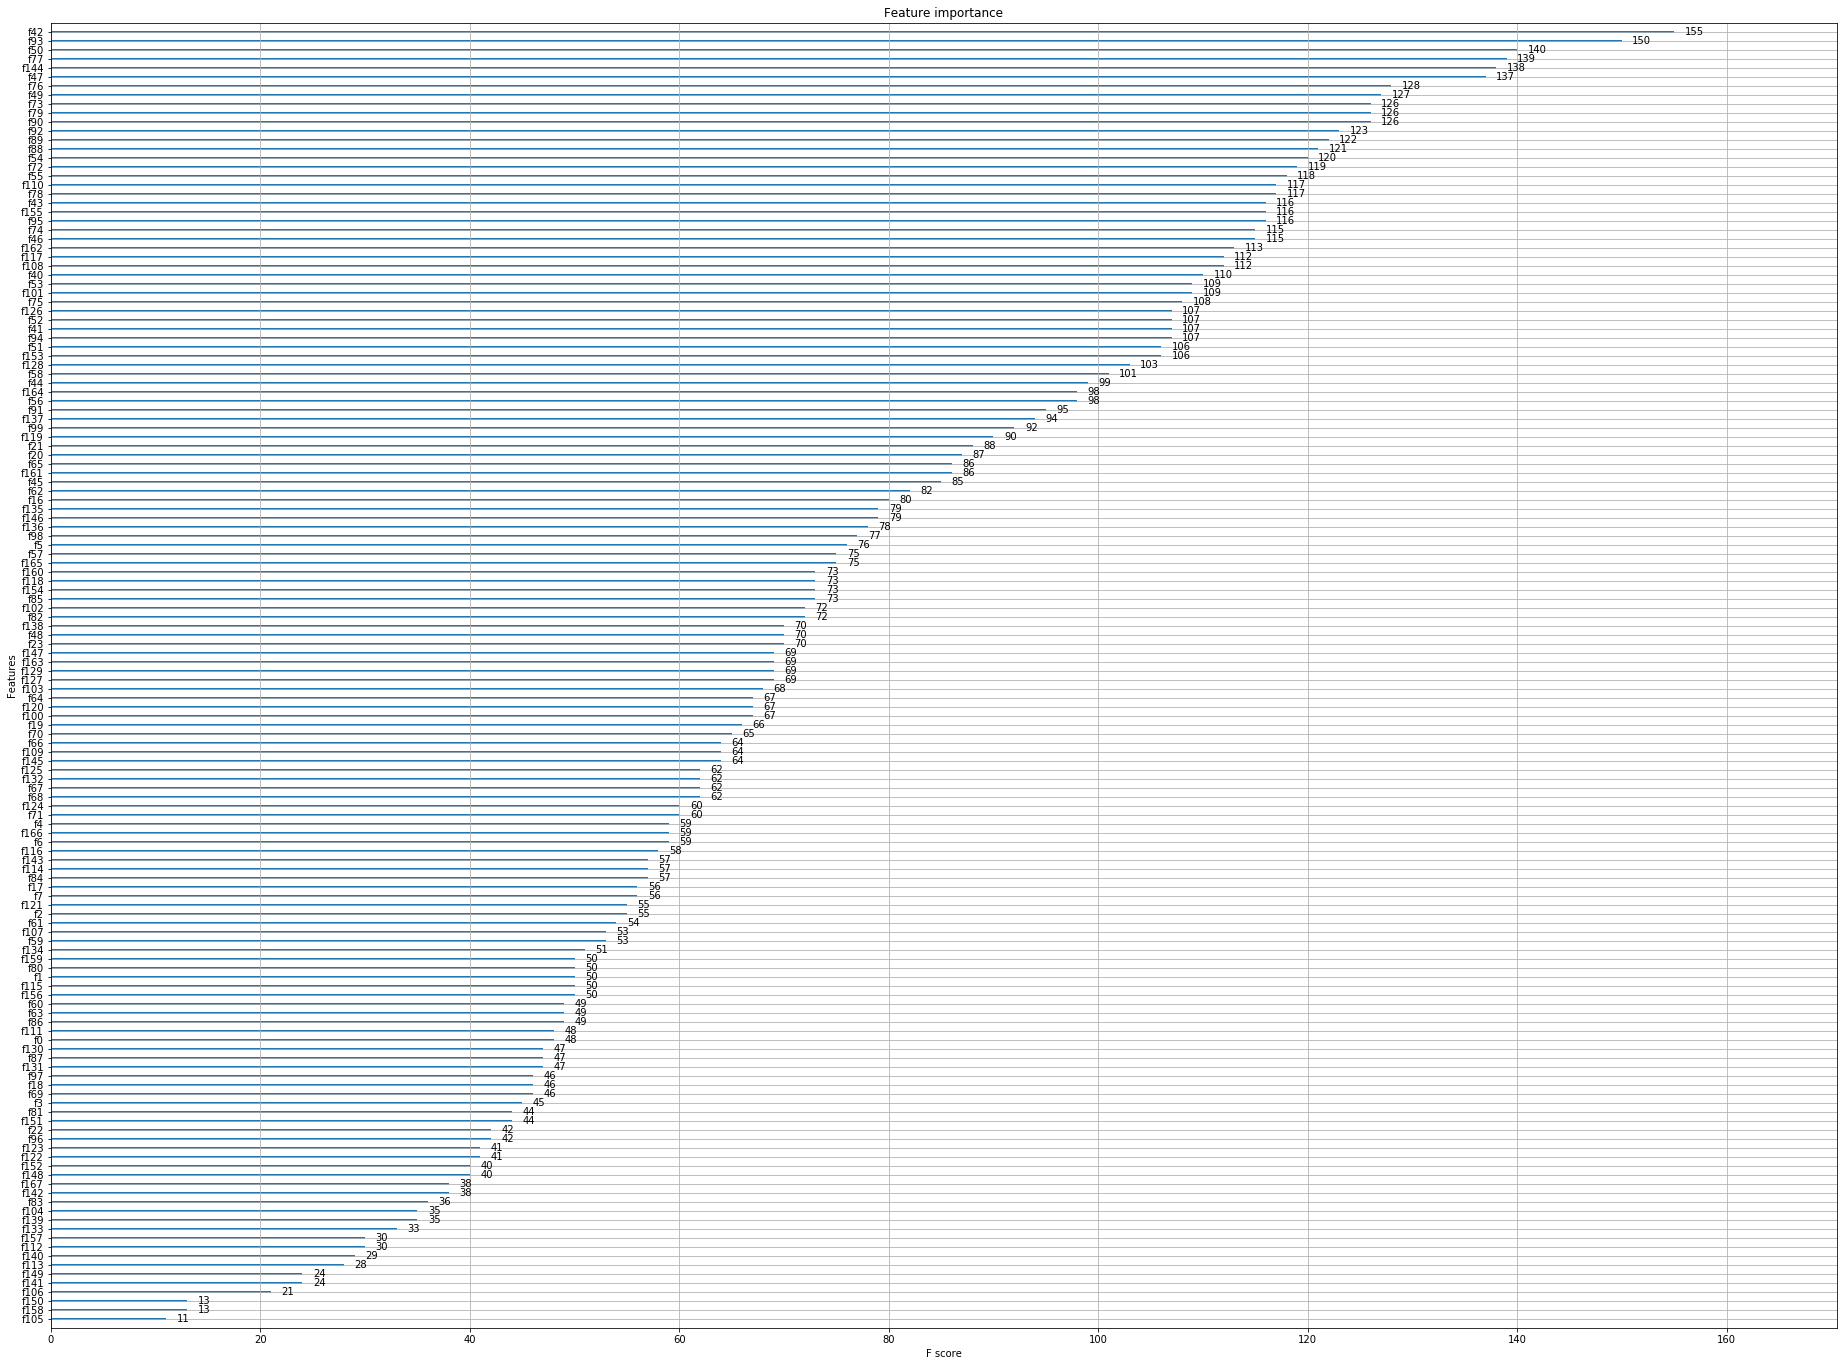

In [515]:
plt.rcParams["figure.figsize"] = (32,24)
plot_importance(model)
plt.show()

In [593]:
y_02[200]

1

(array([  1.,   0.,   3.,  11.,  86., 131.,  15.,   4.,   2.,   1.]),
 array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.], dtype=float32),
 <a list of 10 Patch objects>)

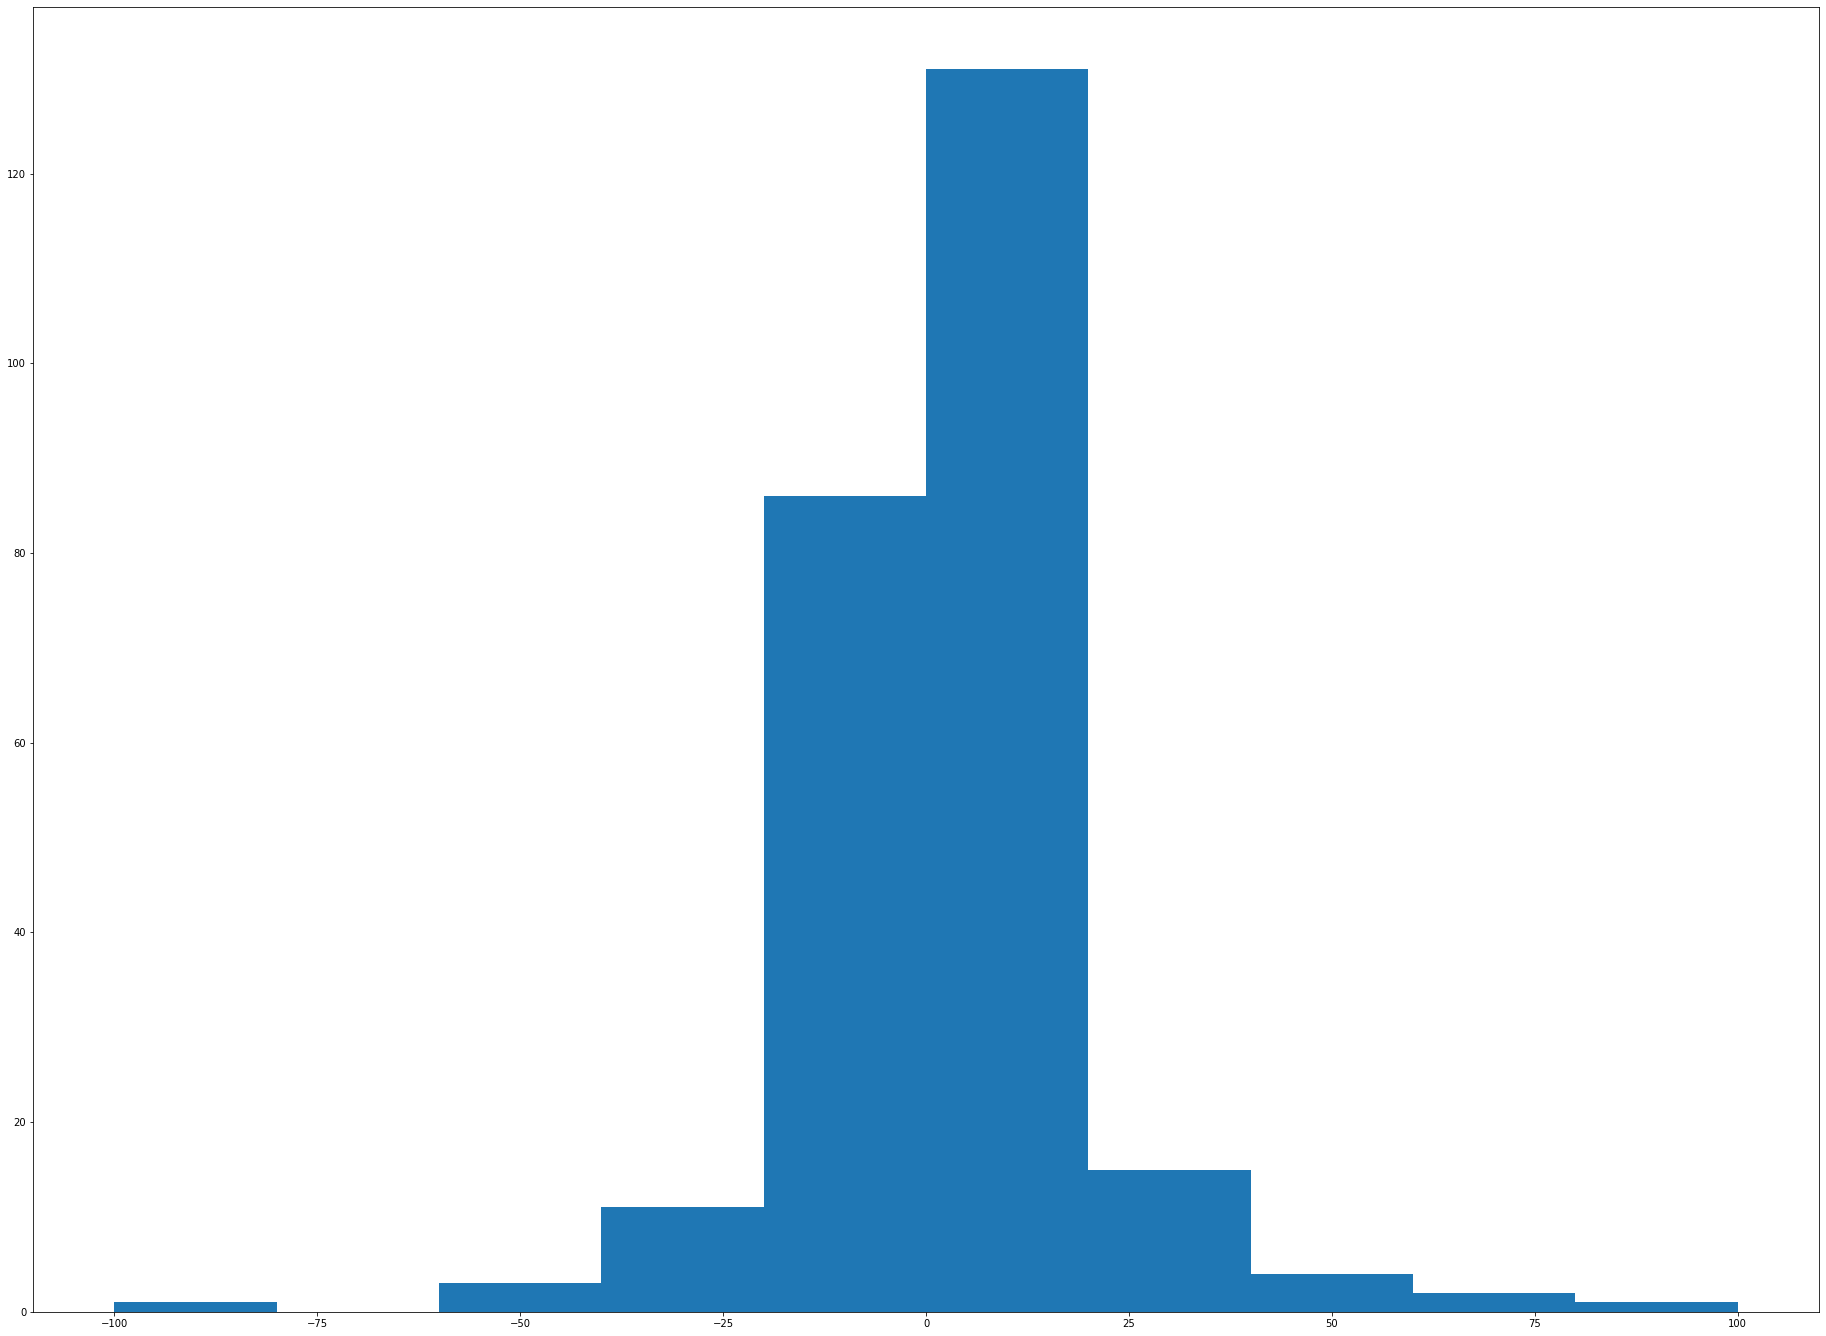

In [292]:
plt.hist(x[10000,:,1],bins=10,range=(-100,100))

In [323]:
import ctypes
player = ctypes.windll.kernel32
player.Beep(1000,200)

1

In [436]:
feature.mean(axis=1)

array([1820.74390164, 1794.98282657, 1366.77049128, ..., 3368.58514734,
       3150.73227432, 2575.55319812])

In [444]:
feature_sc[200,90:150]

array([ 2.65791323e+00,  7.95181939e-01,  1.11527608e-03, -1.24040032e-02,
        4.48318099e+00,  2.85782881e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.11327650e-01,  3.67817467e+00,  1.56499076e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.92075511e-01,  7.49300705e-01,  3.11740075e-01,  3.60821098e+00,
        7.12848340e-01,  5.84933044e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.94618165e-01,
        2.74932611e+00,  4.39620376e+00,  3.41983363e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.07560407e-01,  4.30592149e+00,  7.49695691e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.62577031e-01,
        3.43855072e-01,  1.73382473e-01,  3.45234429e+00,  6.02006660e-02,
        1.21320276e-01,  0.00000000e+00,  0.00000000e+00,  2.73882403e-01,
        0.00000000e+00,  